In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Data points
A_plus = np.array([[1, 1], [0, 2], [3, 0]])
A_minus = np.array([[-2, -1], [0, -2]])

# Combine data and add bias term
data = np.vstack((A_plus, A_minus))
target = np.array([1, 1, 1, -1, -1])  # Labels (+1 for A+, -1 for A-)

In [82]:
# Perceptron Learning Algorithm
def perceptron(data, target, learning_rate=1, epochs=100):
    data_augmented = np.hstack((data, np.ones((data.shape[0], 1))))  # Add bias term
    weight = np.zeros(data_augmented.shape[1])  # Initialize weights
    for _ in range(epochs):
        for i in range(len(target)):
            if target[i] * np.dot(weight, data_augmented[i]) <= 0:
                weight += learning_rate * target[i] * data_augmented[i]
    return weight

weights_perceptron = perceptron(data, target)

In [83]:
# Least Squares Method
def least_squares(data, target):
    data_augmented = np.hstack((data, np.ones((data.shape[0], 1))))
    return np.linalg.inv(data_augmented.T @ data_augmented) @ data_augmented.T @ target

weights_ls = least_squares(data, target)

In [84]:
# Fisher's Linear Discriminant
def fisher(X1, X2):
    mean1 = np.mean(X1, axis=0)
    mean2 = np.mean(X2, axis=0)
    S_w = np.cov(X1.T) + np.cov(X2.T)
    w_fisher = np.linalg.inv(S_w) @ (mean1 - mean2)
    b_fisher = -np.dot(w_fisher, (mean1 + mean2) / 2)
    return np.append(w_fisher, b_fisher)

weights_fisher = fisher(A_plus, A_minus)

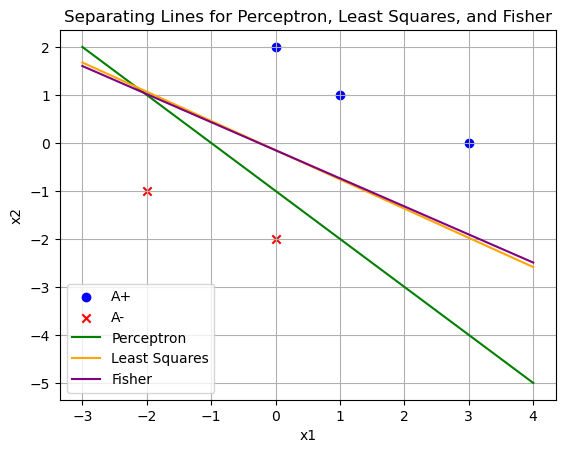

In [85]:
# Plotting
def plot_line(weight, label, color):
    x_vals = np.linspace(-3, 4, 100)
    y_vals = -(weight[0] * x_vals + weight[2]) / weight[1]
    plt.plot(x_vals, y_vals, label=label, color=color)

plt.scatter(A_plus[:, 0], A_plus[:, 1], color='blue', marker='o', label='A+')
plt.scatter(A_minus[:, 0], A_minus[:, 1], color='red', marker='x', label='A-')

plot_line(weights_perceptron, 'Perceptron', 'green')
plot_line(weights_ls, 'Least Squares', 'orange')
plot_line(weights_fisher, 'Fisher', 'purple')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separating Lines for Perceptron, Least Squares, and Fisher')
plt.grid(True)
plt.show()